# Univariate extreme value analysis using Pyextremes

This notebook illustrates how Pyextremes was used to provide results to the benchmark "Exercise 1". Pyextremes implements both Peak Over Threshold and Block Maxima approach. For both approach, parameter are estimated using MLE and confidence intervals are calculated bootstrapping. 

In [1]:
import numpy as np
from pandas import pandas as pd
from matplotlib import pyplot as plt
from pyextremes import EVA

We start by reading the data

In [2]:
data = pd.read_csv("../data/9.0_Points_4.0_IOWAGA.csv", parse_dates = True, index_col = 0).hs

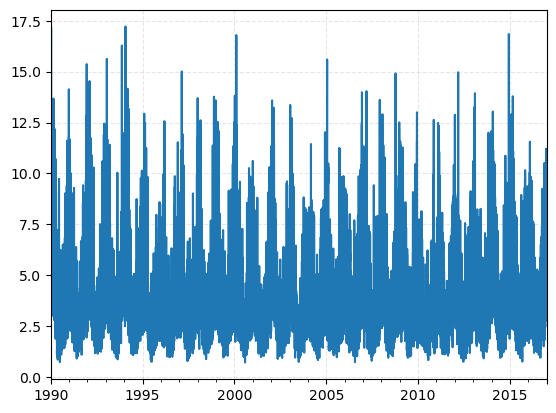

In [3]:
data.plot();

## Block maxima

In [4]:
block_size = "365D"

In [5]:
model = EVA(data=data)

In [6]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size=block_size,
    errors="raise",
)

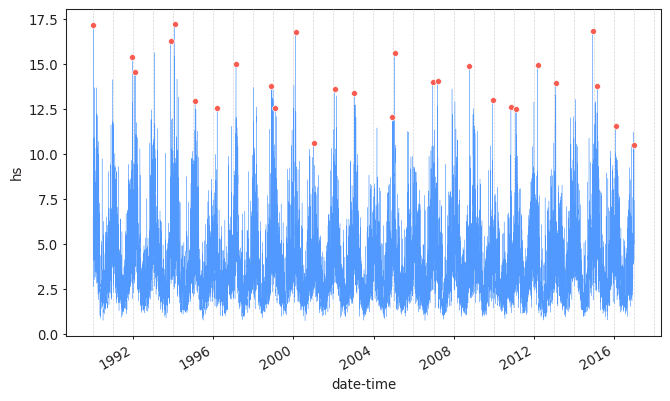

In [7]:
model.plot_extremes();

In [8]:
model.fit_model(distribution = "genextreme")
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            hs      Size:                              78,896
Start:                       January 1990      End:                        December 2016
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 28      Extraction method:                     BM
Type:                                high      Block size:             365 days 00:00:00
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

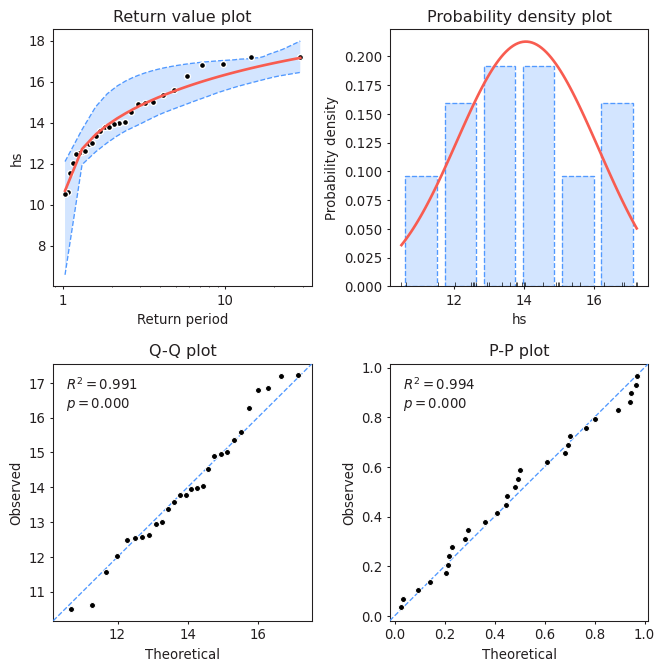

In [9]:
model.plot_diagnostic(alpha=0.95);

Store results to benchmark format

In [10]:
rp_range = np.logspace(0,3, 200)
rl, rl_low , rl_high  = model.get_return_value( rp_range, return_period_size='365.24D', alpha=0.95, n_samples = 1000)
pd.DataFrame(  data ={ "rp" :  rp_range, "return_value" : rl , "ci_low" : rl_low , "ci_high" : rl_high} ).to_csv( "pyextremes_hs_bm.csv", index = False )

## Peak Over Threshold

In [11]:
threshold = 12.5
declustering_window = "2D"

(<Figure size 768x480 with 1 Axes>, <Axes: xlabel='date-time', ylabel='hs'>)

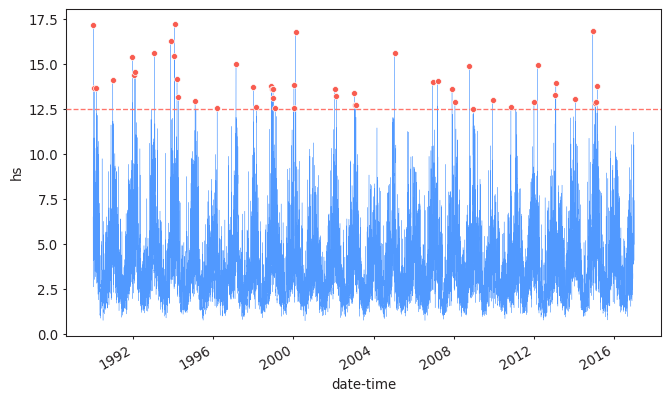

In [12]:
pot = EVA(data=data)

pot.get_extremes(
    method="POT",
    extremes_type="high",
    r=declustering_window,
    threshold=threshold,
)
pot.plot_extremes(show_clusters=False)

In [13]:
len(np.sort(pot.extremes.values))

49

In [14]:
pot.fit_model(distribution = "genpareto")

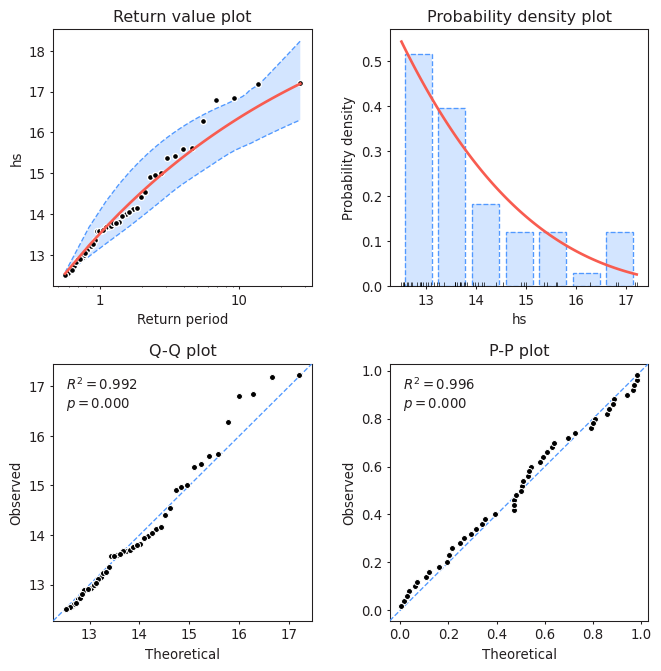

In [15]:
pot.plot_diagnostic(alpha = 0.95);

**Save data to the required benchmark format**

In [16]:
rp_range = np.logspace(0,3, 200)
rl, rl_low , rl_high  = pot.get_return_value( rp_range, return_period_size='365.24D', alpha=0.95)
pd.DataFrame(  data ={ "rp" :  rp_range, "return_value" : rl , "ci_low" : rl_low , "ci_high" : rl_high} ).to_csv( "pyextremes_hs_pot.csv", index = False )